In [5]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import json

In [6]:
row_count = [5400, 4800, 5600, 6500, 4700, 4700, 6500, 5700, 4500, 5500, 4500, 4500, 5200, 3000, 3200, 4400, 3900, 5300, 4000, 3500, 6400, 4700, 5000, 3500, 4400, 5100, 3800, 5300, 4300, 4700, 4300, 6800, 4900, 3900, 5800, 3700, 5200, 3000, 3600, 5100, 5700, 5100, 4800, 4600, 3500, 4200, 4500, 6000, 5300, 3200, 5300, 4600, 4300, 5600, 6000, 5900, 4100, 4600, 5300, 5900, 4500, 4800, 3800, 3800, 5800, 6300, 4900, 6000, 5300, 4300, 5300, 6500, 4900, 6500, 2300, 5800, 5000, 4700, 5000, 3000, 4700, 5300, 6400, 4400, 4100, 4400, 5900, 5300, 4400, 5500, 5000, 5900, 4200, 4600, 4600, 3500, 5200, 5200, 5000, 4700, 4300, 2700, 1900, 3700, 8500, 3500, 5100, 6600, 3900, 8700, 8600, 3000, 4900, 3400, 3200, 1200, 5800, 5000, 1400, 3200]
row_count=np.array(row_count)
row_count=row_count.reshape(-1,1)

### 

In [7]:
# Create and train the Isolation Forest model
model = IsolationForest(contamination=0.05)
model.fit(row_count)

# Predict anomalies (1 for normal, -1 for anomalies)
predictions = model.predict(row_count)
print(predictions)

anomalies = row_count[predictions == 1]
rule_name="expect_row_count_to_be_inbetween"
data={
  "connectionDetails":{
    "tenantId":"rak01",
    "connId":"azure01",
    "connectionType":"azure_blob",
    "configurations":{
        "connectionString": "DefaultEndpointsProtocol=https;AccountName=dataobservability;AccountKey=hzc5eGjhsO/yd9yaCQQFlkcnxex+a4U1hqeALSw7M6COQSyGrhzwPtFb3OMJ4qIIM8JWjKCY6jlz+AStRWaj0w==;EndpointSuffix=core.windows.net",
        "containers": []
    }   
  },
  "configuredRules":[
    {
        "ruleType":"volume",
        "entityLevel1":"default",
        "entityLevel2":"avacado",
        "entityLevel3":"chunk0.csv",
    }
  ]
}

data['configuredRules'][0]["ruleSubType"]=rule_name
data["configuredRules"][0]['config'] = json.dumps({'max_value':int(max(anomalies)[0]),'min_value':int(min(anomalies)[0])})

print(json.dumps(data,indent=4))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1 -1  1]
{
    "connectionDetails": {
        "tenantId": "rak01",
        "connId": "azure01",
        "connectionType": "azure_blob",
        "configurations": {
            "connectionString": "DefaultEndpointsProtocol=https;AccountName=dataobservability;AccountKey=hzc5eGjhsO/yd9yaCQQFlkcnxex+a4U1hqeALSw7M6COQSyGrhzwPtFb3OMJ4qIIM8JWjKCY6jlz+AStRWaj0w==;EndpointSuffix=core.windows.net",
            "containers": []
        }
    },
    "configuredRules": [
        {
            "ruleType": "volume",
            "entityLevel1": "default",
            "entityLevel2": "avacado",
            "entityLevel3": "chunk0.csv",
            "rul

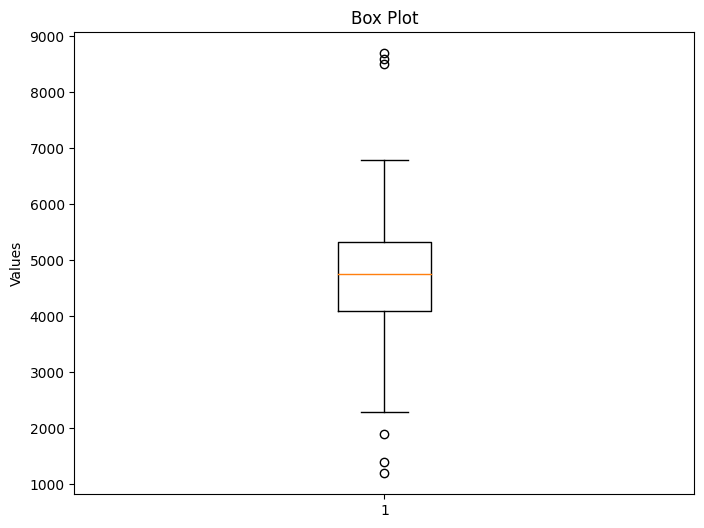

In [21]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.boxplot(row_count)
plt.title("Box Plot")
plt.ylabel("Values")
plt.show()

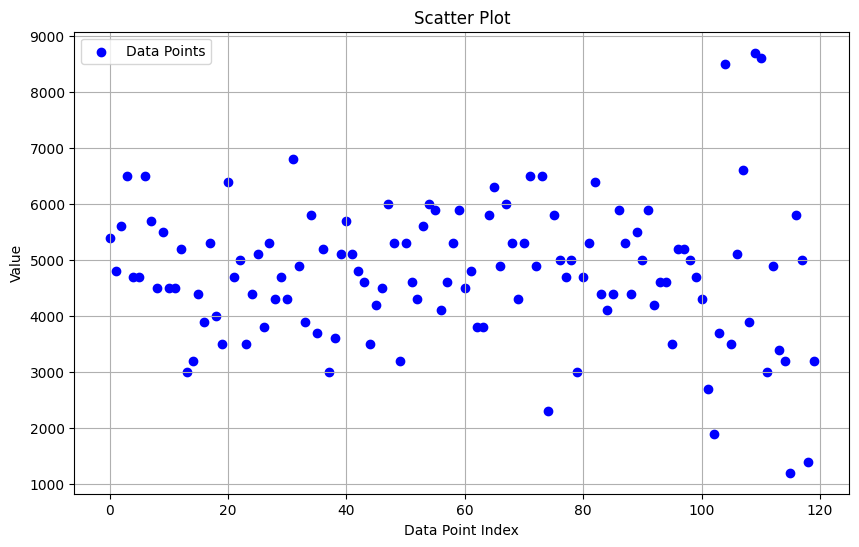

In [22]:
x_values = range(len(row_count))
y_values = [point[0] for point in row_count]

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(x_values, y_values, c='b', marker='o', label='Data Points')  # Customize the appearance as needed
plt.title("Scatter Plot")
plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)  # Add a grid if needed
plt.show()


In [3]:
import json
import pandas as pd
f = open('/Users/rithvik.joshi/Documents/Rackathon/Docs/test_data.json')
data = json.load(f)['links']

df =pd.DataFrame().from_records(data)
print(df)


    source   target
0  Table_A  Table_B
1  Table_A  Table_C
2  Table_B  Table_D
3  Table_C  Table_E
